In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import MinMaxScaler

In [2]:
total_data = pd.read_csv('rainfall.csv',encoding = "ISO-8859-1")
print('Rows     :',total_data.shape[0])
print('Columns  :',total_data.shape[1])
print('\nFeatures :\n     :',total_data.columns.tolist())
print('\nMissing values    :',total_data.isnull().values.sum())
print('\nUnique values :  \n',total_data.nunique())

Rows     : 4116
Columns  : 19

Features :
     : ['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']

Missing values    : 134

Unique values :  
 SUBDIVISION      36
YEAR            115
JAN             802
FEB             898
MAR             978
APR            1234
MAY            1731
JUN            2722
JUL            3050
AUG            2913
SEP            2632
OCT            1939
NOV            1239
DEC             801
ANNUAL         3712
Jan-Feb        1220
Mar-May        2262
Jun-Sep        3683
Oct-Dec        2389
dtype: int64


,Total,Percent
ANNUAL,26,0.006317
Oct-Dec,13,0.003158
NOV,11,0.002672
DEC,10,0.002430
Jun-Sep,10,0.002430


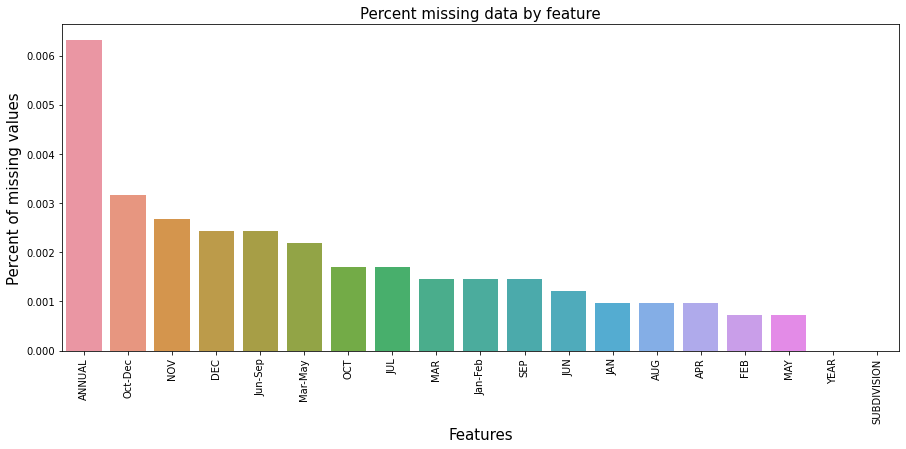

In [8]:
total = total_data.isnull().sum().sort_values(ascending=False)
percent = (total_data.isnull().sum()/total_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

In [9]:
total_data['JAN'].fillna((total_data['JAN'].mean()), inplace=True)
total_data['FEB'].fillna((total_data['FEB'].mean()), inplace=True)
total_data['MAR'].fillna((total_data['MAR'].mean()), inplace=True)
total_data['APR'].fillna((total_data['APR'].mean()), inplace=True)
total_data['MAY'].fillna((total_data['MAY'].mean()), inplace=True)
total_data['JUN'].fillna((total_data['JUN'].mean()), inplace=True)
total_data['JUL'].fillna((total_data['JUL'].mean()), inplace=True)
total_data['AUG'].fillna((total_data['AUG'].mean()), inplace=True)
total_data['SEP'].fillna((total_data['SEP'].mean()), inplace=True)
total_data['OCT'].fillna((total_data['OCT'].mean()), inplace=True)
total_data['NOV'].fillna((total_data['NOV'].mean()), inplace=True)
total_data['DEC'].fillna((total_data['DEC'].mean()), inplace=True)
total_data['ANNUAL'].fillna((total_data['ANNUAL'].mean()), inplace=True)
total_data['Jan-Feb'].fillna((total_data['Jan-Feb'].mean()), inplace=True)
total_data['Mar-May'].fillna((total_data['Mar-May'].mean()), inplace=True)
total_data['Jun-Sep'].fillna((total_data['Jun-Sep'].mean()), inplace=True)
total_data['Oct-Dec'].fillna((total_data['Oct-Dec'].mean()), inplace=True)

In [10]:
total_data.shape

(4116, 19)

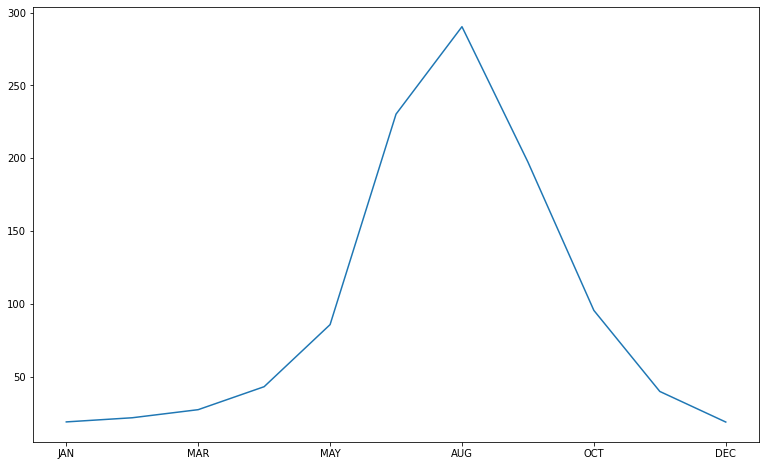

In [11]:
total_data[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN', 'AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot(figsize=(13,8))

In [12]:
groups = total_data.groupby('SUBDIVISION')['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','NOV','DEC','ANNUAL']
data=groups.get_group(('EAST UTTAR PRADESH'))
data

<ipython-input-12-e6ed46c2719d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  groups = total_data.groupby('SUBDIVISION')['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','NOV','DEC','ANNUAL']


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,NOV,DEC,ANNUAL
1012,1901,62.6,31.3,8.2,1.1,13.6,21.8,226.5,285.6,215.4,0.1,2.1,873.2
1013,1902,6.1,2.3,2.4,2.0,21.4,32.5,411.5,155.4,257.2,1.2,0.0,905.2
1014,1903,8.2,0.4,1.3,0.7,15.3,71.6,115.3,420.2,258.7,0.0,0.0,1216.4
1015,1904,7.3,1.5,8.3,0.4,28.7,148.0,359.4,328.8,95.0,17.0,26.3,1071.2
1016,1905,16.8,23.6,20.0,5.4,15.4,17.3,302.4,316.2,169.5,0.0,1.6,891.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,2011,1.0,2.7,1.6,2.9,32.2,163.8,197.9,232.1,146.4,0.0,0.0,781.2
1123,2012,20.3,1.2,3.4,2.8,0.2,18.5,234.2,156.0,164.4,0.3,0.7,602.7
1124,2013,6.1,59.6,2.7,8.7,1.1,309.7,230.0,246.1,78.2,0.5,1.1,1041.4
1125,2014,47.4,25.8,15.4,1.7,10.7,47.8,224.5,138.1,106.7,0.0,8.4,701.2


In [13]:
data=data.melt(['YEAR']).reset_index()
data.head()

,index,YEAR,variable,value
0,0,1901,JAN,62.6
1,1,1902,JAN,6.1
2,2,1903,JAN,8.2
3,3,1904,JAN,7.3
4,4,1905,JAN,16.8


In [14]:
df = data[['YEAR','variable','value']].reset_index().sort_values(by=['YEAR','index'])
df.head()

,index,YEAR,variable,value
0,0,1901,JAN,62.6
115,115,1901,FEB,31.3
230,230,1901,MAR,8.2
345,345,1901,APR,1.1
460,460,1901,MAY,13.6


In [15]:
df.columns=['INDEX','YEAR','Month','avg_rainfall']
df.head()

,INDEX,YEAR,Month,avg_rainfall
0,0,1901,JAN,62.6
115,115,1901,FEB,31.3
230,230,1901,MAR,8.2
345,345,1901,APR,1.1
460,460,1901,MAY,13.6


In [16]:
d={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,
   'OCT':10,'NOV':11,'DEC':12}
df['Month']=df['Month'].map(d)
df.head(12)

,INDEX,YEAR,Month,avg_rainfall
0,0,1901,1.0,62.6
115,115,1901,2.0,31.3
230,230,1901,3.0,8.2
345,345,1901,4.0,1.1
460,460,1901,5.0,13.6
575,575,1901,6.0,21.8
690,690,1901,7.0,226.5
805,805,1901,8.0,285.6
920,920,1901,9.0,215.4
1035,1035,1901,11.0,0.1


In [17]:
df['Date']=pd.to_datetime(df.assign(Day=1).loc[:,['YEAR','Month','Day']])
df.head(12)

,INDEX,YEAR,Month,avg_rainfall,Date
0,0,1901,1.0,62.6,1901-01-01
115,115,1901,2.0,31.3,1901-02-01
230,230,1901,3.0,8.2,1901-03-01
345,345,1901,4.0,1.1,1901-04-01
460,460,1901,5.0,13.6,1901-05-01
575,575,1901,6.0,21.8,1901-06-01
690,690,1901,7.0,226.5,1901-07-01
805,805,1901,8.0,285.6,1901-08-01
920,920,1901,9.0,215.4,1901-09-01
1035,1035,1901,11.0,0.1,1901-11-01


In [18]:
cols=['avg_rainfall']
dataset=df[cols]
dataset.head()

,avg_rainfall
0,62.6
115,31.3
230,8.2
345,1.1
460,13.6


In [19]:
series=dataset
series.head()

,avg_rainfall
0,62.6
115,31.3
230,8.2
345,1.1
460,13.6


In [20]:
series.shape

(1380, 1)

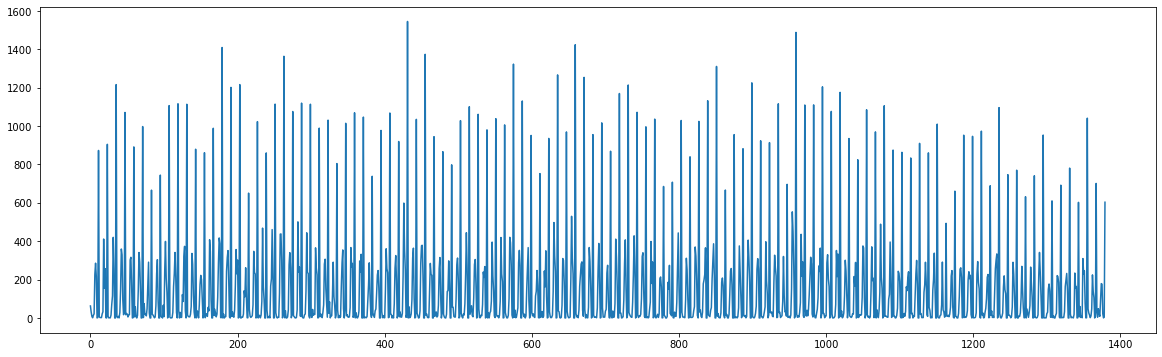

In [21]:
plt.figure(figsize=(20,6))
plt.plot(series.values)
plt.show()

In [22]:
from sklearn.preprocessing import MinMaxScaler
data_raw = series.values.astype("float32")
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(data_raw)
dataset[0:6]

array([[0.04050469],
       [0.02025235],
       [0.00530573],
       [0.00071174],
       [0.00879974],
       [0.01410547]], dtype=float32)

In [23]:
TRAIN_SIZE = 0.80

train_size = int(len(dataset) * TRAIN_SIZE)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print("Number of entries (training set, test set): " + str((len(train), len(test))))

Number of entries (training set, test set): (1104, 276)


In [24]:
def create_dataset(dataset, window_size = 1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + window_size, 0])
    return(np.array(data_X), np.array(data_Y))

In [25]:
window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data shape:")
print(train_X.shape)

Original training data shape:
(1102, 1)
New training data shape:
(1102, 1, 1)


In [26]:
def fit_model(train_X, train_Y, window_size = 1):
    model = Sequential()
    
    model.add(LSTM(2000,activation = 'tanh', recurrent_activation = 'sigmoid', input_shape = (1, window_size)))
    model.add(Dropout(0.2))
    model.add(Dense(500))
    model.add(Dropout(0.4))
    model.add(Dense(500))
    model.add(Dropout(0.4))
    model.add(Dense(400))
    model.add(Dropout(0.4))
    model.add(Dense(1, activation = 'linear'))
    model.compile(loss = "mean_squared_error", 
                  optimizer = "adam",metrics='accuracy')
    model.fit(train_X, 
              train_Y, 
              epochs = 10, 
              batch_size = 64, 
              )
    
    return(model)

In [27]:
model1 = fit_model(train_X, train_Y, window_size)

Epoch 1/10
18/18 [==============================] - 6s 334ms/step - loss: 0.0375 - accuracy: 0.0653
Epoch 2/10
18/18 [==============================] - 6s 341ms/step - loss: 0.0361 - accuracy: 0.0653
Epoch 3/10
18/18 [==============================] - 6s 317ms/step - loss: 0.0366 - accuracy: 0.0653
Epoch 4/10
18/18 [==============================] - 5s 285ms/step - loss: 0.0364 - accuracy: 0.0653
Epoch 5/10
18/18 [==============================] - 5s 276ms/step - loss: 0.0374 - accuracy: 0.0653
Epoch 6/10
18/18 [==============================] - 5s 276ms/step - loss: 0.0357 - accuracy: 0.0653
Epoch 7/10
18/18 [==============================] - 5s 295ms/step - loss: 0.0350 - accuracy: 0.0653
Epoch 8/10
18/18 [==============================] - 5s 291ms/step - loss: 0.0367 - accuracy: 0.0653
Epoch 9/10
18/18 [==============================] - 6s 309ms/step - loss: 0.0370 - accuracy: 0.0653
Epoch 10/10
18/18 [==============================] - 5s 278ms/step - loss: 0.0362 - accuracy: 0.0653

In [28]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 2000)              16016000  
_________________________________________________________________
dropout (Dropout)            (None, 2000)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               1000500   
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 400)               2